# Earth Lab Python Course Final Project: US Soil Moisture Project

* This notebook is a data retrieval notebook for soil moisture data from the National Soil Moisture Network SCAN stations.
* Data Source: National Soil Moisture Network; Soil Climate Analysis Network (SCAN)

In [1]:
NAME = "Kendall Rosenberg"
COLLABORATORS = "N/A"

## Import Libraries

In [2]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import earthpy as et
import warnings
import pandas as pd
import earthpy.plot as ep

# Ignore warnings
warnings.simplefilter('ignore')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [3]:
# # Command to make all dataframes display in full
# pd.set_option("display.max_rows", None, "display.max_columns", None)

## Functions:

In [4]:
# Define function to take in a url and output a dataframe into a target dictionary
def url_to_df(url, station_name, dictionary):
    """Function that takes a url to a csv file and downloads and 
    imports the data contained at the url. Then, it changes the station name 
    in the new dataframe to an input name given (ideally the name of the station),
    removes any unnecessary columns of data, and changes the month names from int 
    to str month name format.

        Parameters
        ----------
        url : url to csv file
            Input url to a csv file.

        station_name : str
            Name of the station for the data being imported and downloaded.

        dictionary : dictionary
            Empty dictionary for the created dataframes to be exported to.

        Returns
        ------
        No physical return; Returns any newly created dataframes to the input 
        empty dictionary specified.
    """
    
    path_to_data = os.path.join(et.data.get_data(url=url))
    
    dataframe = pd.read_csv(path_to_data)
    
    dataframe['Station ID'] = station_name
    
    output_dataframe = dataframe[['Station ID', 'year', 'month', 'day', 'doy',
                                  'sm_5cm', 'sm_10cm', 'sm_20cm', 'sm_50cm', 'sm_100cm']]
    
    output_dataframe['month'].replace({1: "Jan", 2: "Feb", 3: "Mar", 
                                  4: "Apr", 5: "May", 6: "Jun", 
                                  7: "Jul", 8: "Aug", 9: "Sep", 
                                  10: "Oct", 11: "Nov", 12: "Dec"}, 
                                 inplace=True)
    
    
    dictionary.update({station_name: output_dataframe})

In [5]:
def plot_yearly_avg_sm(station_name):
    """Function that takes an input station name and plots the yearly 
    average soil moisture values for each depth (5cm, 10cm, 20cm, 50cm, 100cm).  
    Please note that for this function to run, a dataframe of yearly average soil 
    moisture for each depth must exist under the name "yearly_avg_sm"

        Parameters
        ----------
        station_name : str
            Description...


        Returns
        ------
        No physical return.  Will output a plot of yearly average soil moisture 
        at each depth for the station specified.

    """

    filler_yearly_avg_sm = yearly_avg_sm(soil_moisture_dict[station_name])
    
    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(20, 10))

    # Subplot of daily mean discharge from Aug-Oct 2013 at various Colorado stream sites
    ax.plot(filler_yearly_avg_sm.index.values,
         filler_yearly_avg_sm['sm_5cm'],
         color="blue",
         marker='o',
         label="5cm")
    ax.plot(filler_yearly_avg_sm.index.values,
         filler_yearly_avg_sm['sm_10cm'],
         color="red",
         marker='o', label="10cm")
    ax.plot(filler_yearly_avg_sm.index.values,
         filler_yearly_avg_sm['sm_20cm'],
         color="green",
         marker='o', label="20cm")
    ax.plot(filler_yearly_avg_sm.index.values,
         filler_yearly_avg_sm['sm_50cm'],
         color="purple",
         marker='o', label="50cm")
    ax.plot(filler_yearly_avg_sm.index.values,
         filler_yearly_avg_sm['sm_100cm'],
         color="orange",
         marker='o',
         label="100cm")
    
    ax.legend()
    ax.legend(title='Soil Moisture Depth of Measurement\n')
    fig.suptitle("Yearly Mean Soil Moisture", fontsize=20)
    ax.set_title(station_name)
    ax.set_xlabel("Year")
    ax.set_ylabel("Soil Moisture %")

In [6]:
def plot_monthly_avg_sm(station_name, year):
    """Function that takes an input station name and plots the monthly 
    average soil moisture values for each depth (5cm, 10cm, 20cm, 50cm, 100cm) 
    for a specified year. Please note that for this function to run, a dataframe 
    of monthly average soil moisture for each depth must exist under the name "monthly_mean"

        Parameters
        ----------
        station_name : str
            Name of station you want plotted.

        year : int
            Integer value for the year desired.


        Returns
        ------
        No physical return.  Will output a plot of monthly average soil moisture 
        at each depth for the station and year specified.

    """
    
    filler_monthly_avg_sm = monthly_mean(soil_moisture_dict[station_name], year)
    
    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(20, 10))

    # Subplot of daily mean discharge from Aug-Oct 2013 at various Colorado stream sites
    ax.plot(filler_monthly_avg_sm.index.values,
         filler_monthly_avg_sm['sm_5cm'],
         color="blue",
         marker='o',
         label="5cm")
    ax.plot(filler_monthly_avg_sm.index.values,
         filler_monthly_avg_sm['sm_10cm'],
         color="red",
         marker='o', label="10cm")
    ax.plot(filler_monthly_avg_sm.index.values,
         filler_monthly_avg_sm['sm_20cm'],
         color="green",
         marker='o', label="20cm")
    ax.plot(filler_monthly_avg_sm.index.values,
         filler_monthly_avg_sm['sm_50cm'],
         color="purple",
         marker='o', label="50cm")
    ax.plot(filler_monthly_avg_sm.index.values,
         filler_monthly_avg_sm['sm_100cm'],
         color="orange",
         marker='o',
         label="100cm")
    
    ax.legend()
    ax.legend(title='Soil Moisture Depth of Measurement\n')
    fig.suptitle("Monthly Mean Soil Moisture", fontsize=20)
    ax.set_title(station_name)
    ax.set_xlabel("Month")
    ax.set_ylabel("Soil Moisture %")

In [7]:
def plot_daily_avg_sm(station_name, year):
    """Function that takes an input station name and plots the daily 
    average soil moisture values for each depth (5cm, 10cm, 20cm, 50cm, 100cm) 
    for a specified year. Please note that for this function to run, a dataframe 
    of daily average soil moisture for each depth must exist under the name "daily_avg"

        Parameters
        ----------
        station_name : str
            Name of station you want plotted.

        year : int
            Integer value for the year desired.


        Returns
        ------
        No physical return.  Will output a plot of daily average soil moisture 
        at each depth for the station and year specified.

    """
    
    filler_daily_avg_sm = daily_avg(soil_moisture_dict[station_name], year)
    
    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(20, 10))

    # Subplot of daily mean discharge from Aug-Oct 2013 at various Colorado stream sites
    ax.plot(filler_daily_avg_sm.index.values,
         filler_daily_avg_sm['sm_5cm'],
         color="blue",
         marker='o',
         label="5cm")
    ax.plot(filler_daily_avg_sm.index.values,
         filler_daily_avg_sm['sm_10cm'],
         color="red",
         marker='o', label="10cm")
    ax.plot(filler_daily_avg_sm.index.values,
         filler_daily_avg_sm['sm_20cm'],
         color="green",
         marker='o', label="20cm")
    ax.plot(filler_daily_avg_sm.index.values,
         filler_daily_avg_sm['sm_50cm'],
         color="purple",
         marker='o', label="50cm")
    ax.plot(filler_daily_avg_sm.index.values,
         filler_daily_avg_sm['sm_100cm'],
         color="orange",
         marker='o',
         label="100cm")
    
    ax.legend()
    ax.legend(title='Soil Moisture Depth of Measurement\n')
    fig.suptitle("Daily Mean Soil Moisture", fontsize=20)
    ax.set_title(station_name)
    ax.set_xlabel("Julian Day")
    ax.set_ylabel("Soil Moisture %")

### Need docstring / in-progress

In [8]:
def generate_hist(station_name):
    soil_moisture_dict[station_name].hist(column='sm_5cm')
    soil_moisture_dict[station_name].hist(column='sm_10cm')
    soil_moisture_dict[station_name].hist(column='sm_20cm')
    soil_moisture_dict[station_name].hist(column='sm_50cm')
    soil_moisture_dict[station_name].hist(column='sm_100cm')

In [9]:
# Function to export a soil moisture dataframe as a csv to Jupyter Hub
def export_csv(dataframe):
    dataframe.to_csv(r'Path where you want to store the exported CSV file\File Name.csv')

## Download and Import Data

* Use custom function defined above to download, import, and clean each site's data.  These cleaned output dataframes are then placed inside of an output dictionary for ease of access.
* Each site can be called in the dictionary by the station name I have assigned it.

In [10]:
# Create target dictionary for storage of site data
soil_moisture_dict = {}

In [11]:
# Download and import data for each site using function
# Bushland, TX: 2006
url_to_df("http://nationalsoilmoisture.com/test/VWC_QAQC/scan/2006.csv", "bushland", soil_moisture_dict)

# Nunn, Colorado: 2017
url_to_df("http://nationalsoilmoisture.com/test/VWC_QAQC/scan/2017.csv", "nunn", soil_moisture_dict)

# Fort Assiniboine, Montana: 2019
url_to_df("http://nationalsoilmoisture.com/test/VWC_QAQC/scan/2019.csv", "assiniboine", soil_moisture_dict)

# Mandan, North Dakota: 2020
url_to_df("http://nationalsoilmoisture.com/test/VWC_QAQC/scan/2020.csv", "mandan", soil_moisture_dict)

# Lind, Washington: 2021
url_to_df("http://nationalsoilmoisture.com/test/VWC_QAQC/scan/2021.csv", "lind", soil_moisture_dict)

# Beasley Lake, Mississippi: 2032
url_to_df("http://nationalsoilmoisture.com/test/VWC_QAQC/scan/2032.csv", "beasley", soil_moisture_dict)

# Eastview Farm, Tennessee: 2077
url_to_df("http://nationalsoilmoisture.com/test/VWC_QAQC/scan/2077.csv", "eastview", soil_moisture_dict)

# Mammoth Cave, Kentucky: 2079
url_to_df("http://nationalsoilmoisture.com/test/VWC_QAQC/scan/2079.csv", "mammoth", soil_moisture_dict)

# Abrams, Kansas: 2092
url_to_df("http://nationalsoilmoisture.com/test/VWC_QAQC/scan/2092.csv", "abrams", soil_moisture_dict)

In [12]:
# List of all stations:
station_list = ["bushland", "nunn", "assiniboine", "mandan", "lind", "beasley", "eastview", "mammoth", "abrams"]

### Preview dataframe for any station

In [13]:
# Query for a specific station's soil moisture dataframe
soil_moisture_dict["bushland"]

,Station ID,year,month,day,doy,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
0,bushland,1996.0,Nov,5.0,310.0,0.334,0.373,0.415,0.226,NaN
1,bushland,1996.0,Nov,6.0,311.0,0.334,0.368,0.414,0.229,NaN
2,bushland,1996.0,Nov,7.0,312.0,0.332,0.366,0.415,0.225,NaN
3,bushland,1996.0,Nov,8.0,313.0,0.331,0.366,0.412,0.225,NaN
4,bushland,1996.0,Nov,9.0,314.0,0.331,0.363,0.410,0.228,NaN
...,...,...,...,...,...,...,...,...,...,...
7072,bushland,2019.0,Jan,18.0,18.0,NaN,0.252,0.376,0.429,0.379
7073,bushland,2019.0,Jan,19.0,19.0,NaN,0.252,0.376,0.429,0.379
7074,bushland,2019.0,Jan,20.0,20.0,NaN,0.257,0.378,0.428,0.378
7075,bushland,2019.0,Jan,21.0,21.0,NaN,0.262,0.379,0.428,0.378


### Missing data review

In [14]:
# Total number of missing values in each column
soil_moisture_dict["bushland"].isnull().sum()

Station ID      0
year            0
month           0
day             0
doy             0
sm_5cm        164
sm_10cm         0
sm_20cm       163
sm_50cm       331
sm_100cm      180
dtype: int64

### Histogram of station data

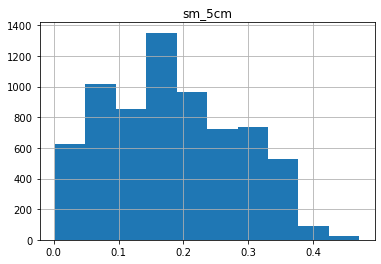

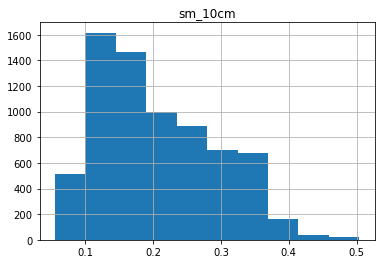

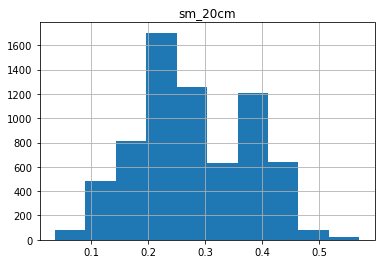

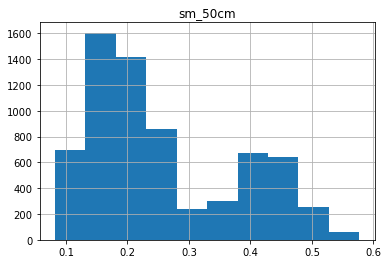

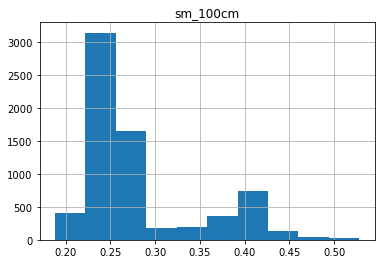

In [15]:
# Histogram of soil moisture values for a specific depth
generate_hist("bushland")

## Yearly Dataframes

### Yearly average SM at each depth

In [16]:
# Function that takes an input dataframe of soil moisture and outputs a dataframe of yearly average SM
def yearly_avg_sm(soil_moisture_dataframe):
    """Function that takes an input dataframe containing raw soil moisture data, 
    and turns it into an output dataframe that contains data from the input 
    dataframe grouped by year and averaged.  Note that for this function to work 
    properly you need to include every year of data desired in the "years_list"
    contained within the function.

        Parameters
        ----------
        soil_moisture_dataframe : dataframe
            Dataframe containing raw soil moisture data.


        Returns
        ------
        empty_dataframe : dataframe
            Dataframe showing yearly average soil moisture for every year contained in the 
            "years_list."

    """
    
    years_list = (1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 
              2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 
              2014, 2015, 2016, 2017, 2018, 2019, 2020)
    
    empty_dataframe = pd.DataFrame()
    
    for x in years_list:
        sm_year = soil_moisture_dataframe[soil_moisture_dataframe["year"] == x]

        sm_year_mean = sm_year.groupby(
                                ["year"])[["sm_5cm", "sm_10cm", 
                                           "sm_20cm", "sm_50cm", 
                                           "sm_100cm"]].mean()
    
        empty_dataframe = empty_dataframe.append(sm_year_mean)
    
    return empty_dataframe

In [17]:
# Yearly average SM for the Bushland, Texas station
bushland_yearly_avg_sm = yearly_avg_sm(soil_moisture_dict["bushland"])
bushland_yearly_avg_sm.head()

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
year,,,,,
1997.0,0.303501,0.283471,0.350668,0.310074,0.270207
1998.0,0.250584,0.267707,0.325737,0.324337,0.330614
1999.0,0.285592,0.277441,0.326066,0.346526,0.323247
2000.0,0.248454,0.240333,0.245344,0.325503,0.252210
2001.0,0.243230,0.221227,0.216830,0.276962,0.276490


### Yearly average SM for a specific month (JAN) "month of the year"

In [18]:
# Function that takes an input SM dataframe and returns a dataframe displaying yearly average SM for a specified month
def yearly_mean_month(soil_moisture_dataframe, month_name):
    """Function that takes an input dataframe and specified month name 
    and returns a new dataframe that shows yearly average soil moisture 
    values for a specific month, across all years of data.

        Parameters
        ----------
        soil_moisture_dataframe: dataframe
            Input dataframe containing raw soil moisture data.

        month_name : str
            3-letter string month name (e.g. Jan, Feb, Mar, etc.)


        Returns
        ------
        sm_year_month_mean : dataframe
            Output dataframe showing yearly average soil moisture 
            values for a specific month across all years of data.

    """
    
    sm_year_month = soil_moisture_dataframe[soil_moisture_dataframe["month"] == month_name]

    sm_year_month_mean = sm_year_month.groupby(
        ["year"])[["sm_5cm", "sm_10cm", "sm_20cm", "sm_50cm", "sm_100cm"]].mean()

    return sm_year_month_mean

In [19]:
# January yearly average for the Bushland, TX station
bushland_yr_mean_month = yearly_mean_month(soil_moisture_dict["bushland"], "Jan")

bushland_yr_mean_month.head()

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
year,,,,,
1997.0,0.331323,0.361419,0.412935,0.380194,NaN
1998.0,0.324935,0.344065,0.410355,0.417677,0.306516
1999.0,0.273129,0.276097,0.363935,0.424484,0.378935
2000.0,0.340677,0.328484,0.382032,0.431226,0.243516
2001.0,0.347032,0.333903,0.319452,0.240097,0.230000


## Monthly Dataframes

### Monthly average SM at each depth for a specific year
* year must be in integer format

In [20]:
# Function to take an input SM dataframe and calculate monthly average SM for each depth across one specific year
def monthly_mean(soil_moisture_dataframe, year):
    """Function that takes an input dataframe of raw soil moisture data and a 
    specified year and returns an output dataframe showing monthly average soil 
    moisture for each depth across that year.

        Parameters
        ----------
        soil_moisture_dataframe : type
            Input dataframe containing raw soil moisture data.

        year : int
            Integer value for the year desired.


        Returns
        ------
        station_sm_monthly_mean : dataframe
            Dataframe showing monthly mean soil moisture for each depth across a 
            specified year.

    """
    
    station_sm_monthly_mean = soil_moisture_dataframe[soil_moisture_dataframe["year"] == year]

    station_sm_monthly_mean = station_sm_monthly_mean.groupby(
        ["month"])[["sm_5cm", "sm_10cm", "sm_20cm", "sm_50cm", "sm_100cm"]].mean()
    
    return station_sm_monthly_mean

In [21]:
# Monthly mean SM for the Bushland, TX station in the year 2018
bushland_monthly_mean_2018 = monthly_mean(soil_moisture_dict["bushland"], 2000)

bushland_monthly_mean_2018

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
month,,,,,
Apr,0.270267,0.274967,0.370600,0.441867,0.248233
Aug,0.133710,0.140129,0.080677,0.266645,0.266581
Dec,0.308516,0.293323,0.278645,0.283903,0.235097
Feb,0.302862,0.290931,0.362448,0.406966,0.242414
Jan,0.340677,0.328484,0.382032,0.431226,0.243516
Jul,0.272258,0.231581,0.236065,0.270000,0.265613
Jun,0.255300,0.231600,0.225333,0.265667,0.261767
Mar,0.313742,0.280387,0.396710,0.423129,0.245935
May,0.184581,0.183806,0.172032,0.294871,0.254484


### Monthly average SM at each depth across all years of data

In [22]:
# Function that takes an input dataframe and calculates monthly mean SM across all years of data
def monthly_mean_all_years(soil_moisture_dataframe):
    """Function that takes an input dataframe of raw soil moisture data and 
    outputs a new dataframe that shows monthly mean soil moisture across all 
    years of data.

        Parameters
        ----------
        soil_moisture_dataframe : type
            Input dataframe containing raw soil moisture data.


        Returns
        ------
        monthly_sm_mean : dataframe
            Dataframe that shows monthly mean soil moisture across all 
            years of data.

    """
    
    monthly_sm_mean = soil_moisture_dataframe.groupby(
    ["month"])[["sm_5cm", "sm_10cm", "sm_20cm", "sm_50cm", "sm_100cm"]].mean()

    # Reindex dataframe to put month names in order
    monthly_sm_mean = monthly_sm_mean.reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
     'Oct', 'Nov', 'Dec'])
    
    return monthly_sm_mean

In [23]:
# Monthly mean SM across all years of data for the Bushland, TX station
bushland_monthly_mean_all_years = monthly_mean_all_years(soil_moisture_dict["bushland"])

bushland_monthly_mean_all_years

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
month,,,,,
Jan,0.213421,0.231745,0.288462,0.280469,0.279481
Feb,0.234058,0.250009,0.315587,0.297199,0.277695
Mar,0.222238,0.241435,0.327301,0.300645,0.291070
Apr,0.180884,0.203661,0.298963,0.285104,0.294789
May,0.162750,0.185088,0.266969,0.260536,0.292708
Jun,0.167968,0.185611,0.270082,0.238613,0.282688
Jul,0.172617,0.185016,0.267057,0.235588,0.275444
Aug,0.151477,0.186474,0.260647,0.232595,0.277965
Sep,0.147986,0.184263,0.249305,0.219524,0.267153


## Daily Dataframes

### Daily average SM at each depth across a specific year
* year must be in integer format

In [24]:
def daily_avg(soil_moisture_dataframe, year):
    """Function that turns an input dataframe of raw soil moisture data 
    into a new dataframe showing daily average soil moisture across a 
    specified year.

        Parameters
        ----------
        soil_moisture_dataframe : dataframe
            Input dataframe containing raw soil moisture data.

        year : int
            Integer value for the year desired.


        Returns
        ------
        sm_daily_avg_year : dataframe
            Dataframe containing daily average soil moisture across 
            a specified year.
            
    """
    
    sm_daily_avg = soil_moisture_dataframe.set_index('doy')
    sm_daily_avg_year = sm_daily_avg[sm_daily_avg["year"] == year]
    
    return sm_daily_avg_year

In [25]:
# Daily average SM for the Bushland, TX station for the year 2018
bushland_daily_avg_sm_2018 = daily_avg(soil_moisture_dict["bushland"], 2018)

bushland_daily_avg_sm_2018

,Station ID,year,month,day,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
doy,,,,,,,,,
1.0,bushland,2018.0,Jan,1.0,0.180,0.131,0.283,0.381,0.383
2.0,bushland,2018.0,Jan,2.0,0.199,0.124,0.276,0.385,0.385
3.0,bushland,2018.0,Jan,3.0,0.205,0.136,0.280,0.383,0.383
4.0,bushland,2018.0,Jan,4.0,0.201,0.139,0.278,0.383,0.381
5.0,bushland,2018.0,Jan,5.0,0.199,0.136,0.281,0.383,0.382
...,...,...,...,...,...,...,...,...,...
361.0,bushland,2018.0,Dec,27.0,NaN,0.234,0.370,0.441,0.388
362.0,bushland,2018.0,Dec,28.0,NaN,0.234,0.368,0.442,0.389
363.0,bushland,2018.0,Dec,29.0,NaN,0.234,0.370,0.441,0.388


### Daily average SM for each day of the year, across all years of data

In [26]:
def daily_avg_all_years(soil_moisture_dataframe):
    """Function that takes an input dataframe of raw soil moisture data 
    and turns it into a dataframe showing average soil moisture value for 
    each Julian day of the year, across all years of data.

        Parameters
        ----------
        soil_moisture_dataframe : dataframe
            Input dataframe containing raw soil moisture data.


        Returns
        ------
        sm_year_daily_all_years : dataframe
            Dataframe showing average soil moisture value for 
            each Julian day of the year, across all years of data.

    """
    
    sm_daily_avg_all_years = soil_moisture_dataframe.set_index('doy')

    sm_year_daily_all_years = sm_daily_avg_all_years.groupby(
        ["doy"])[["sm_5cm", "sm_10cm", "sm_20cm", "sm_50cm", "sm_100cm"]].mean()
    
    return sm_year_daily_all_years

In [27]:
# Daily average SM across all years of data for the Bushland, TX station
bushland_daily_avg_all_years = daily_avg_all_years(soil_moisture_dict["bushland"])

bushland_daily_avg_all_years.head()

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
doy,,,,,
1.0,0.211053,0.22995,0.283684,0.275105,0.279211
2.0,0.210263,0.22865,0.283000,0.275684,0.279263
3.0,0.216789,0.23130,0.287421,0.275105,0.281789
4.0,0.215632,0.23300,0.287368,0.292895,0.281316
5.0,0.213421,0.23160,0.288158,0.296158,0.282000


## Decad & Pentad Dataframes

In [ ]:
# def pentad_mean():

In [ ]:
# def decad_mean():

## PLOTS OF SOIL MOISTURE

### Yearly plots

* The code cell below will generate a plot of yearly mean soil moisture based on an input of the station name.  This name must match the name given in the "Download and Import Data" section for the station.  AKA it must be the name of the station's key in the dictionary created to hold all of the station soil moisture dataframes.

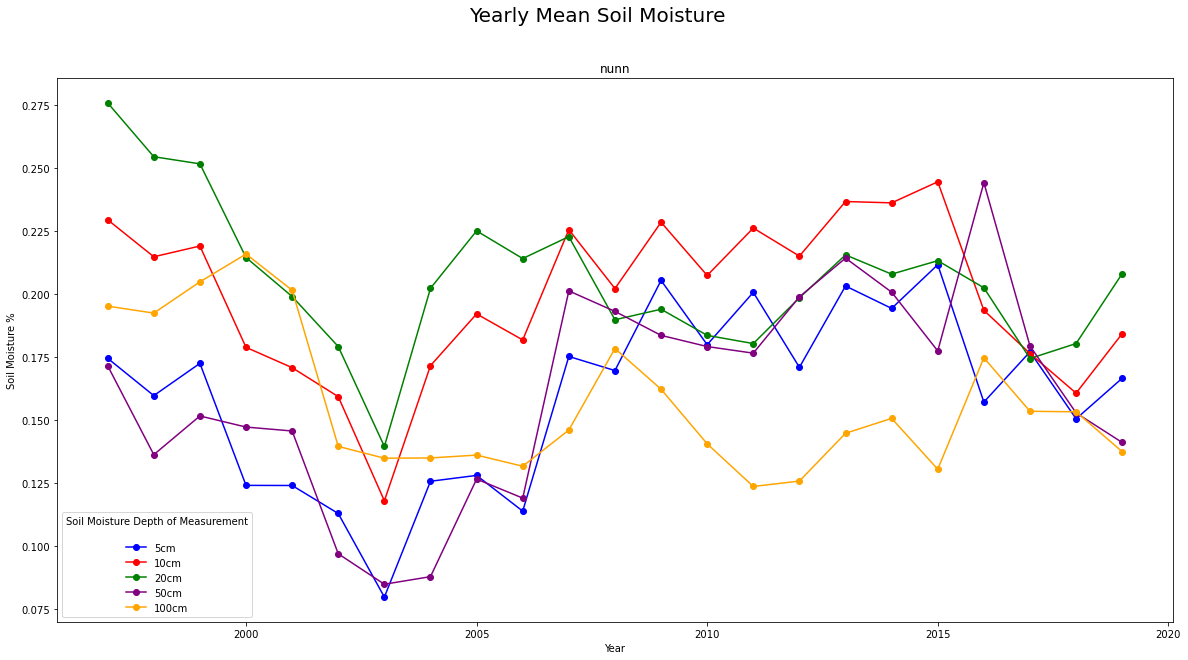

In [28]:
# Plot of yearly average soil moisture for a specified station across all years of data
plot_yearly_avg_sm("nunn")

### Monthly plots

* The code cell below will generate a plot of monthly mean soil moisture based on an input of the station name and the year specified.  This name must match the name given in the "Download and Import Data" section for the station.  AKA it must be the name of the station's key in the dictionary created to hold all of the station soil moisture dataframes.

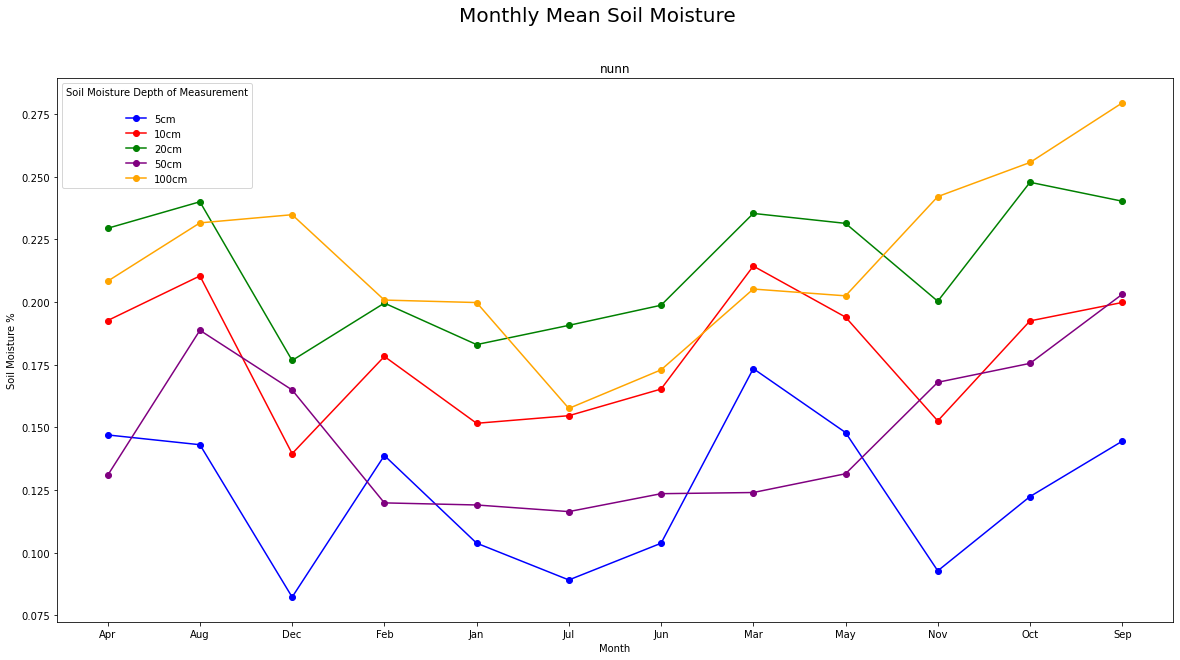

In [29]:
# Plot monthly average soil moisture for a specific station and year
plot_monthly_avg_sm("nunn", 2000)

### Daily plots

* The code cell below will generate a plot of daily mean soil moisture based on an input of the station name and the year specified.  This name must match the name given in the "Download and Import Data" section for the station.  AKA it must be the name of the station's key in the dictionary created to hold all of the station soil moisture dataframes.

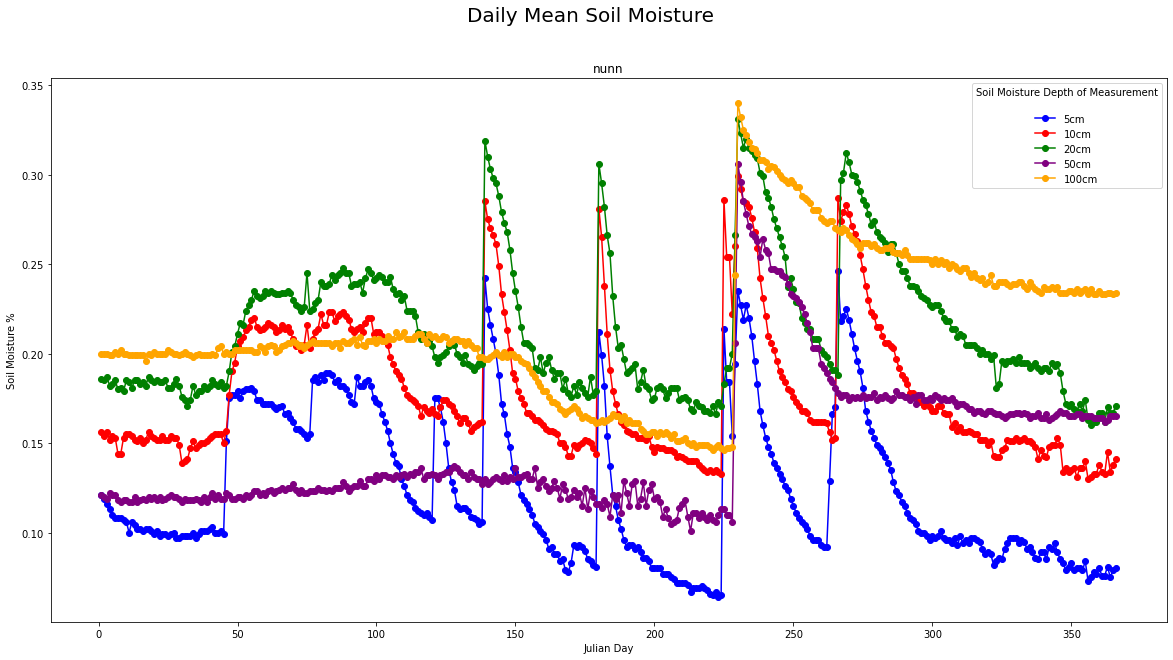

In [30]:
# Plot of daily mean soil moisture at a specified station for a specified year
plot_daily_avg_sm("nunn", 2000)